In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error

In [2]:
# Carregar dados do CPU
machine = 'm_3330.csv'
workload = pd.read_csv(machine, 
             names = ['machine_id', 'time_stamp', 'cpu', 'mem', 'mem_gps', 
                      'mkpi', 'net_in', 'net_out', 'disk_io_percent'])
workload.time_stamp = pd.to_datetime(workload.time_stamp, unit='s')
workload.set_index('time_stamp', inplace=True)
workload = workload.resample('1min').interpolate()
workload

,machine_id,cpu,mem,mem_gps,mkpi,net_in,net_out,disk_io_percent
time_stamp,,,,,,,,
1970-01-01 00:00:00,m_3330,17.0,92.0,NaN,NaN,45.21,38.10,3.0
1970-01-01 00:01:00,m_3330,24.0,92.0,NaN,NaN,45.21,38.10,4.0
1970-01-01 00:02:00,m_3330,16.0,91.0,NaN,NaN,45.21,38.10,4.0
1970-01-01 00:03:00,m_3330,16.0,92.0,NaN,NaN,45.22,38.10,4.0
1970-01-01 00:04:00,m_3330,16.0,92.0,NaN,NaN,45.22,38.10,4.0
...,...,...,...,...,...,...,...,...
1970-01-08 23:55:00,m_3330,25.0,92.0,5.17,0.0,62.64,55.28,4.0
1970-01-08 23:56:00,m_3330,21.0,90.0,7.04,1.0,62.64,55.28,4.0
1970-01-08 23:57:00,m_3330,26.0,90.0,4.41,0.0,62.65,55.28,4.0


In [3]:
# split data in train (75%) test (24%) validation (1%)
df = workload
df_len = len(df)
train_len = int(df_len * 0.75)
test_len = int(df_len * 0.24)
validation_len = df_len - train_len - test_len

In [4]:
workload_len = len(workload)
features_len = 60

In [5]:
features = []
labels = []
for pos in range(features_len, workload_len):
    features.append(np.array(workload['cpu'][pos-features_len:pos]))
    labels.append(np.array(workload['cpu'][pos]))

In [6]:
# normalize feature datas
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)
print(features_scale.shape)
print(features_scale[-1])

(11460, 60)
[0.17333333 0.13333333 0.17333333 0.30666667 0.38666667 0.34666667
 0.17333333 0.21333333 0.18666667 0.14666667 0.18666667 0.13333333
 0.17333333 0.14666667 0.14666667 0.17333333 0.14666667 0.16
 0.49333333 0.34666667 0.36       0.29333333 0.28       0.25333333
 0.26666667 0.2        0.14666667 0.13333333 0.16       0.13333333
 0.08       0.14666667 0.14666667 0.13333333 0.13333333 0.09333333
 0.08       0.10666667 0.10666667 0.2        0.14666667 0.13333333
 0.17333333 0.12       0.12       0.08       0.05333333 0.04
 0.06666667 0.06666667 0.09333333 0.05333333 0.08       0.14666667
 0.17333333 0.2        0.13333333 0.08       0.14666667 0.10666667]


In [7]:
# split data in train (75%) test (24%) validation (1%)
df = workload
# reset index
df.reset_index(inplace=True)
df_len = len(df)
train_len = int(df_len * 0.75)
test_len = int(df_len * 0.24)
validation_len = df_len - train_len - test_len
train_len, test_len, validation_len

(8640, 2764, 116)

In [8]:
# split train and test datasets
X_train = features_scale[:train_len]
X_test = features_scale[train_len:-validation_len]

y_train = np.array(labels[:train_len])
y_test = np.array(labels[train_len:-validation_len])

# show datasets shapes
for x in [X_train, X_test, y_train, y_test]:
    print(x.shape)

(8640, 60)
(2704, 60)
(8640,)
(2704,)


In [9]:

## Appling linear regression to train an model

# create a model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

# create a predict
pred = lr.predict(X_test)

In [10]:
# validate predict with test set
rmse = mean_squared_error(y_test, pred)
print(f'root_mean_squared_error: {rmse}')
mse = mean_squared_error(y_test, pred, squared=False)
print(f'mean_squared_error: {mse}')
cd = r2_score(y_test, pred)
print(f'Determination coeficient: {cd}')
ev = explained_variance_score(y_test, pred)
print(f'explained_variance_score: {ev}')
me = max_error(y_test, pred)
print(f'max_error: {me}')
mae = mean_absolute_error(y_test, pred)
print(f'mean_absolute_error: {mae}')

root_mean_squared_error: 39.05878227613667
mean_squared_error: 6.249702575014004
Determination coeficient: 0.6607518086537683
explained_variance_score: 0.6609083302330602
max_error: 38.52033951729045
mean_absolute_error: 4.749729475401526


<AxesSubplot:>

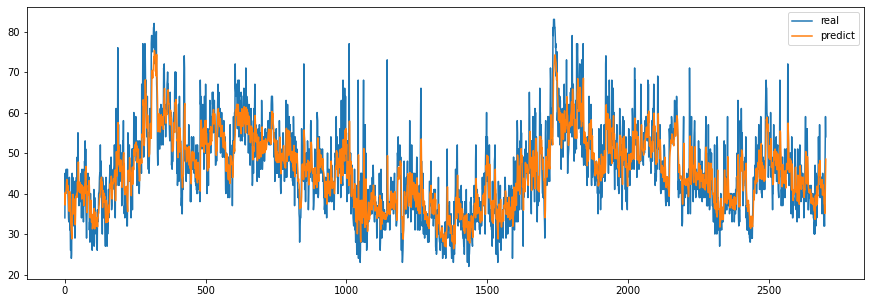

In [11]:
plot_df = pd.DataFrame({'real':y_test, 'predict':pred})
plot_df.plot(figsize=(15,5))

In [12]:
# predict execution
predict = features_scale[-validation_len:]
exchange_date_full = df['time_stamp']
exchange_date = exchange_date_full[-validation_len:]
close_full = df['cpu']
close = close_full[-validation_len:]

pred = lr.predict(predict)

val_df = pd.DataFrame({'date':exchange_date, 'real':close, 'predict':pred})
val_df['real'] = val_df['real'].shift(+1)
val_df.dropna(inplace=True)

val_df.set_index('date', inplace=True)
val_df

,real,predict
date,,
1970-01-08 22:05:00,52.0,48.462874
1970-01-08 22:06:00,54.0,49.046859
1970-01-08 22:07:00,53.5,49.974984
1970-01-08 22:08:00,53.0,49.122296
1970-01-08 22:09:00,46.0,48.150420
...,...,...
1970-01-08 23:55:00,30.0,27.574300
1970-01-08 23:56:00,25.0,26.680506
1970-01-08 23:57:00,21.0,23.630477


<AxesSubplot:xlabel='date'>

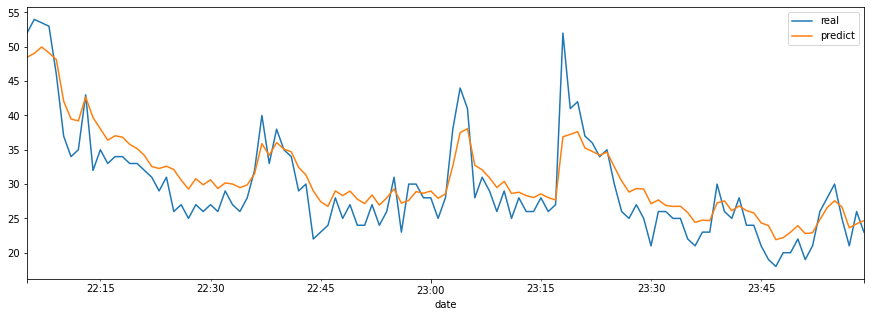

In [13]:
val_df.plot(figsize=(15,5))

In [14]:
# validate predict with validation set
rmse = mean_squared_error(val_df['real'], val_df['predict'])
print(f'root_mean_squared_error: {rmse}')
mse = mean_squared_error(val_df['real'], val_df['predict'], squared=False)
print(f'mean_squared_error: {mse}')
cd = r2_score(val_df['real'], val_df['predict'])
print(f'Determination coeficient: {cd}')
ev = explained_variance_score(val_df['real'], val_df['predict'])
print(f'explained_variance_score: {ev}')
me = max_error(val_df['real'], val_df['predict'])
print(f'max_error: {me}')
mae = mean_absolute_error(val_df['real'], val_df['predict'])
print(f'mean_absolute_error: {mae}')

root_mean_squared_error: 11.471255239372997
mean_squared_error: 3.386924156129422
Determination coeficient: 0.7955485783892948
explained_variance_score: 0.8307196870044312
max_error: 15.10163217590106
mean_absolute_error: 2.7964219636639127
